In [1]:
!python -m pip install --upgrade --no-deps --force-reinstall git+https://github.com/ttopac/keras-resnet.git@original_regularization_w2D
# !python -m pip install --upgrade --no-deps --force-reinstall git+https://github.com/broadinstitute/keras-resnet.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ttopac/keras-resnet.git (to revision original_regularization_w2D) to /tmp/pip-req-build-bu5_rumk
  Running command git clone -q https://github.com/ttopac/keras-resnet.git /tmp/pip-req-build-bu5_rumk
  Running command git checkout -b original_regularization_w2D --track origin/original_regularization_w2D
  Switched to a new branch 'original_regularization_w2D'
  Branch 'original_regularization_w2D' set up to track remote branch 'original_regularization_w2D' from 'origin'.
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=23371 sha256=ad294d31d6ab2dcd888b9baf4ca3039a022b569b898a6cde44ffcbe38fbb03c1
  Stored in directory: /tmp/pip-ephem-wheel-cache-3knrx4oy/wheels/cb/9a/93/151e56cd383b086116afce8aa113e84fc4d6618c807dbeb93b
Successfully built keras-resnet
  Attempting uninstall: keras-resnet
    Found existing installation: ker

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import datetime
from tensorflow.python import tf2
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#checking shape
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
#definig class name
class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

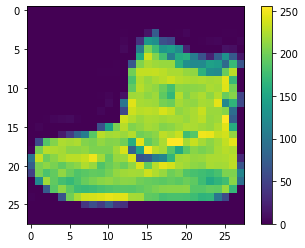

In [ ]:
#plotting image
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

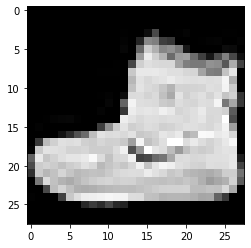

In [ ]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [6]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [7]:
print (X_train.shape)
print (X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


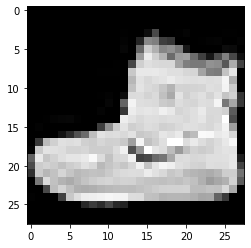

In [8]:
plt.imshow(X_train[0,:,:,0], cmap = 'gray')
plt.show()

In [9]:
# Normalize the images. It works better for backpropagation 
X_train = X_train / 255
X_test_original = X_test
X_test = X_test / 255

# This time we are not doing flattening because CNN takes 2D.

In [10]:
import keras_resnet.models

classes = 10

y_categorical = to_categorical(y_train)

model = keras_resnet.models.ResNet2D18(classes=classes)

# Compile the model.
model.compile(
  optimizer='adam', #here we could use stochastic gradient descent, but adam is a de facto standard
  loss='categorical_crossentropy', #this is how we create the original blame to play the blame game
  metrics=['accuracy'],
)

# Define a checkpoint for saving the model as validation loss improves
checkpointer = tf.keras.callbacks.ModelCheckpoint(
  filepath="model_weights_temp", 
  verbose=0, 
  save_best_only=True,
  save_weights_only=True)

# Train the model.
history = model.fit(
  X_train,
  to_categorical(y_train), # just to make sure the outputs are not considered numeric (because, ya know, they are numbers...)
  validation_data = (X_test, to_categorical(y_test)),
  epochs=75, # go 20 times through the whole dataset
  batch_size=32, # send 32 images at a time before you tweak the network again, to make it faster
  callbacks = [checkpointer],
)
with open("history_temp.p", "wb") as file_pi:
  pickle.dump(history.history, file_pi)


Epoch 1/75
1875/1875 [==============================] - 33s 15ms/step - loss: 0.4800 - accuracy: 0.8227 - val_loss: 0.3629 - val_accuracy: 0.8687
Epoch 2/75
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3230 - accuracy: 0.8808 - val_loss: 0.3671 - val_accuracy: 0.8780
Epoch 3/75
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2802 - accuracy: 0.8964 - val_loss: 0.3126 - val_accuracy: 0.8882
Epoch 4/75
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2564 - accuracy: 0.9042 - val_loss: 0.3145 - val_accuracy: 0.8951
Epoch 5/75
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2345 - accuracy: 0.9132 - val_loss: 0.2895 - val_accuracy: 0.9000
Epoch 6/75
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2157 - accuracy: 0.9195 - val_loss: 0.2883 - val_accuracy: 0.8974
Epoch 7/75
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2056 - accuracy: 0.9234 - val_loss: 0.2623 -

In [16]:
model.build((1,28,28,1))
print (model.summary())

Model: "ResNet1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              multiple                  3136      
                                                                 
 bn_conv1 (ResNetBatchNormal  multiple                 256       
 ization)                                                        
                                                                 
 conv1_relu (Activation)     multiple                  0         
                                                                 
 pool1 (MaxPooling2D)        multiple                  0         
                                                                 
 pool5 (GlobalAveragePooling  multiple                 0         
 2D)                                                             
                                                                 
 fc1000 (Dense)              multiple                  513

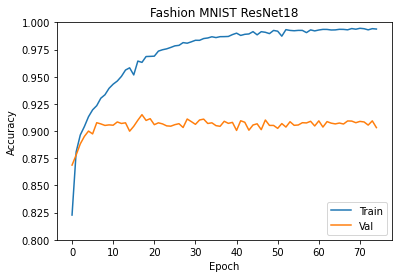

In [21]:
#Viz the model & training history
def visualizetraining(history):
  fig = plt.figure()
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title ('Fashion MNIST ResNet18')
  plt.ylabel ('Accuracy')
  plt.xlabel ('Epoch')
  plt.legend (['Train', 'Val'], loc='lower right')
  plt.ylim (0.8, 1.0)
  plt.show()
  fig.savefig('plot_history_training_temp.png',dpi=300)

visualizetraining(history.history)

In [22]:
from keras.utils import plot_model

def visualizemodel(classifier):
  plot_model(classifier, to_file="model_architecture_temp.png", expand_nested=False)

print (visualizemodel(model))

None


In [36]:
predicted = model.predict(X_test)


313/313 [==============================] - 2s 5ms/step
